In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
%matplotlib inline

### Peaches facts ([link](https://en.wikipedia.org/wiki/Peach)) :

* Peaches grow in a fairly limited range in dry, continental or temperate climates, since the trees have a chilling requirement. Most cultivars require 500 hours of chilling around 0 to 10 °C (32 to 50 °F). During the chilling period, key chemical reactions occur, but the plant appears dormant. Once the chilling period is fulfilled, the plant enters a second type of dormancy, the quiescence period. During quiescence, buds break and grow when sufficient warm weather favorable to growth is accumulated.
* Another climate constraint is spring frost. The trees flower fairly early (in March in western Europe) and the blossom is damaged or killed if temperatures drop below about −4 °C (25 °F). However, if the flowers are not fully open, they can tolerate a few degrees colder.
* Climates with significant winter rainfall at temperatures below 16 °C (61 °F) are also unsuitable for peach cultivation as the rain promotes peach leaf curl, which is the most serious fungal disease for peaches. In practice, fungicides are extensively used for peach cultivation in such climates, with >1% of European peaches exceeding legal pesticide limits in 2013.
* Finally, summer heat is required to mature the crop, with mean temperatures of the hottest month between 20 and 30 °C (68 and 86 °F).
* Peach trees need full sun, and a layout that allows good natural air flow to assist the thermal environment for the tree. 
* Peaches are climacteric fruits and continue to ripen after being picked from the tree.
* Ripen time depends on cultivar ([link](https://www.hunker.com/13428868/how-long-do-peaches-take-to-ripen)) :
> Different types of peaches ripen at different times. Early-ripening varieties, such as **Springcrest** and **Junegold** are harvested in mid- to late May. These peaches take only six to eight weeks to ripen. Others take much longer. Late-ripening varieties, such as **Redskin** and **Jefferson** are not ripe until late June. In general, most varieties are ready to be harvested in late June and early July, which means it takes them about 11 to 12 weeks to ripen.

* Peaches can "wake-up" in winter, on a warm spell ([link](http://homeguides.sfgate.com/peaches-flower-63025.html)) :
> If your peach trees have enough chill hours and "wake up" during a warm spell at the end of winter, the flower buds they produce could be damaged by late-winter freezes. Each stage of flower development is increasingly more susceptible to subfreezing temperatures. Swelling buds are the most resilient. The temperature has to be at or below 1 degree Fahrenheit to kill 90 percent of swelling buds on peach trees, but 90 percent of post-bloom flowers are killed by a temperature colder than 25 degrees Fahrenheit.

In [6]:
# Perhaps, it was possible for peaches to ripen by the end of May 2013, 
# if the following set of conditions was met for at least 1 region in Crimea:
# - Cold period (500+ hours) with temperature 0-10 C 
# (600-900 hours, 0-7 C according to http://homeguides.sfgate.com/peaches-flower-63025.html) )
# - Next mild/warm climate (10+ C), when peaches start to blossom (1+ month)
# - Hot period (20-30 C) to mature (Springcrest & Junegold - 6 to 8 weeks)

In [7]:
with open("./data/.header.csv") as f:
    header = f.readline().split(",")
print(header)

df = pd.read_csv("./data/Crimean_weather-2013.csv", names=header)

['city_name', 'date', 'time', 'min_temperature', 'max_temperature', 'atmosphere', 'pressure', 'humidity', 'wind_direction', 'wind_strength']


In [91]:
print(df.count())

city_name          12393
date               12393
time               12393
min_temperature    12393
max_temperature    12393
atmosphere         12393
pressure           12393
humidity           12393
wind_direction     12393
wind_strength      12393
datetime           12393
dtype: int64


In [92]:
for city in df["city_name"].unique():
    print(city)

Ялта
Алушта
Бахчисарай
Джанкой
Евпатория
Саки
Керчь
Красноперекопск
Щелкино
Симферополь
Судак
Феодосия
Армянск
Черноморское
Севастополь


In [13]:
df['datetime'] = df.apply(lambda row: ' '.join([row['date'], row['time']]), axis=1)
df['datetime'] = pd.to_datetime(df['datetime'])

In [16]:
df.query("city_name == 'Бахчисарай' & date >= '2013-01-01' & date <= '2013-06-01'").count()

city_name          347
date               347
time               347
min_temperature    347
max_temperature    347
atmosphere         347
pressure           347
humidity           347
wind_direction     347
wind_strength      347
datetime           347
dtype: int64

In [39]:
df_test = df.query("city_name == 'Бахчисарай' & date >= '2013-01-01' & date <= '2013-06-01'")
df_test = df_test.reset_index(drop=True)
df_test = df_test.sort_values('datetime')

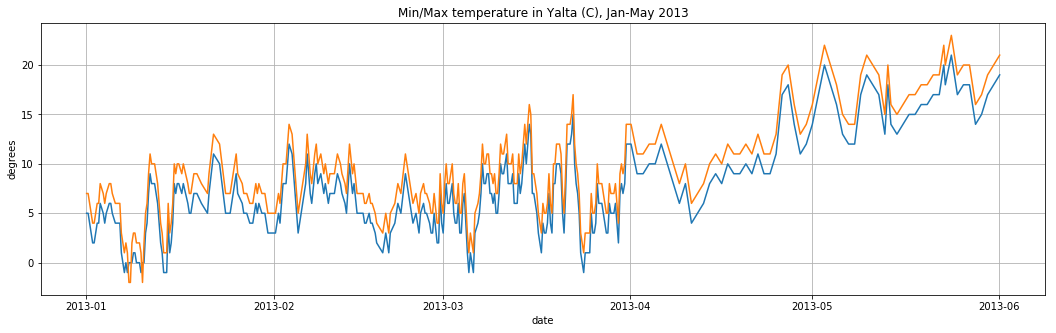

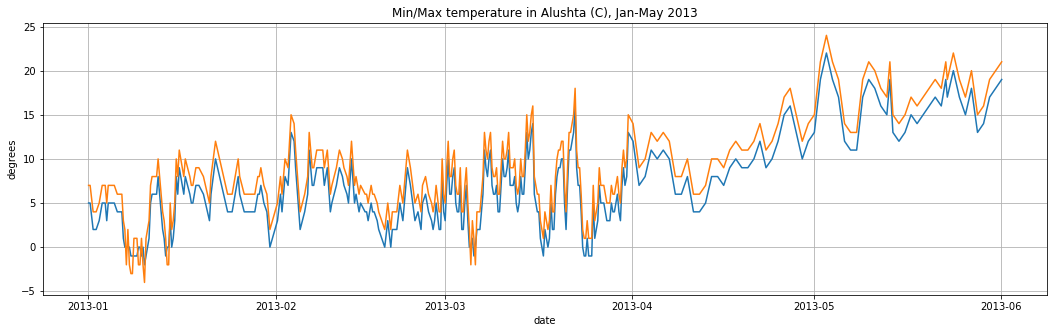

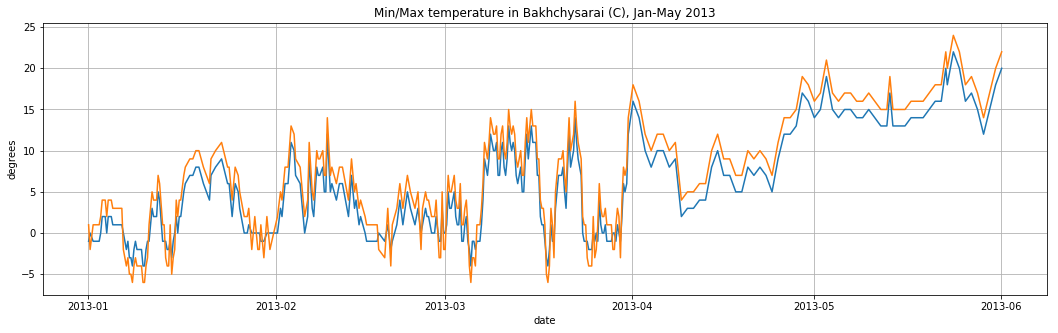

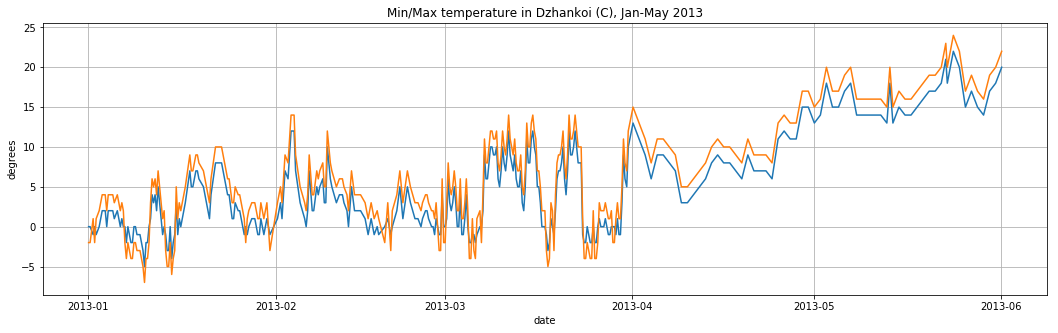

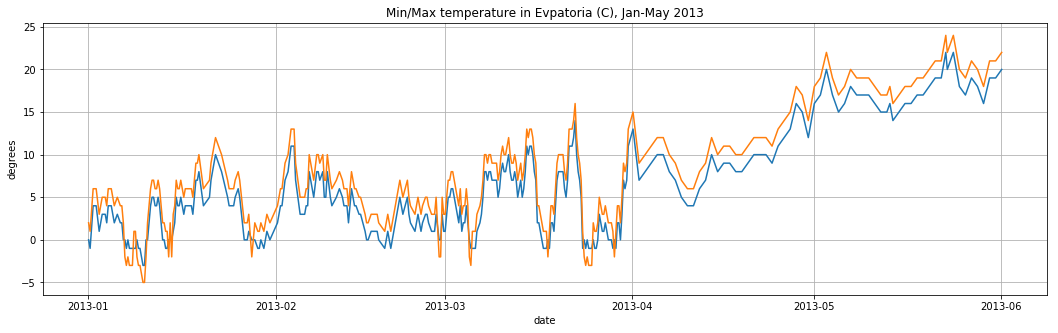

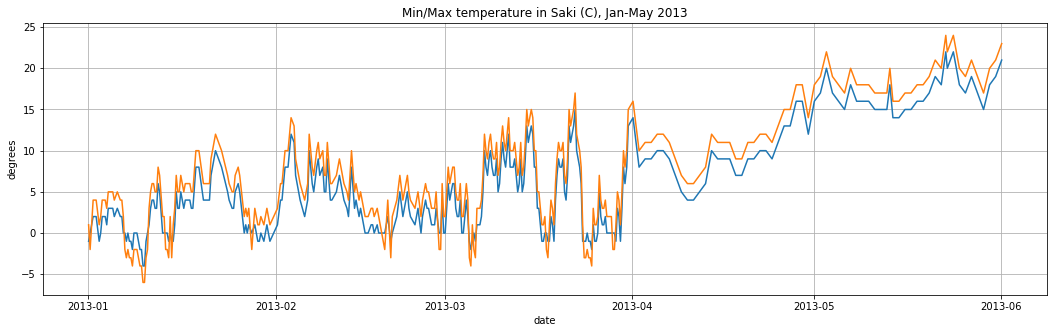

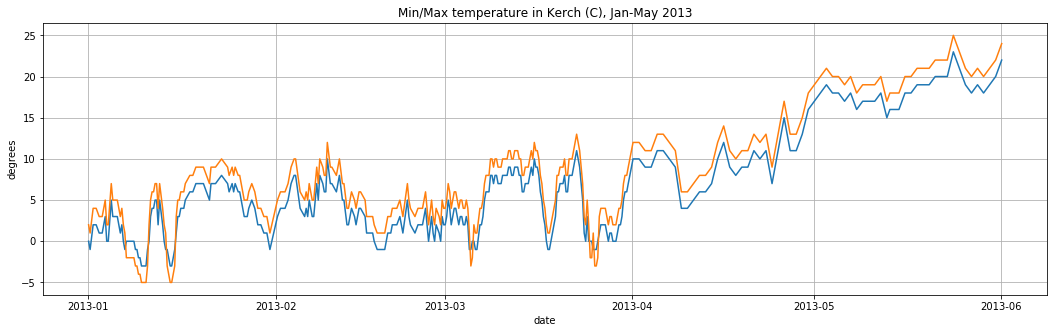

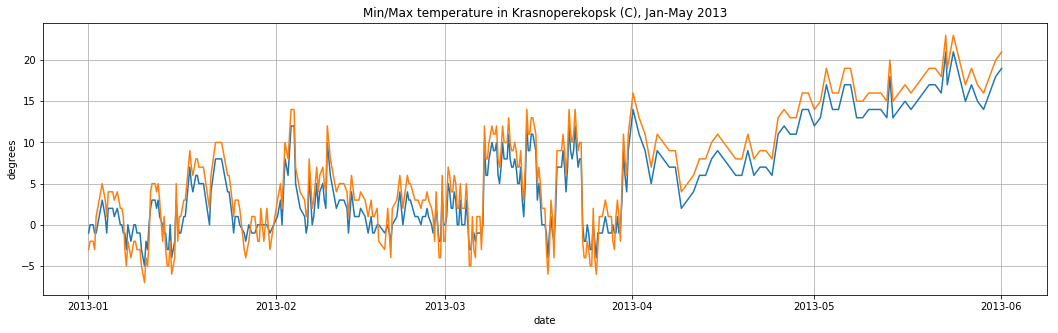

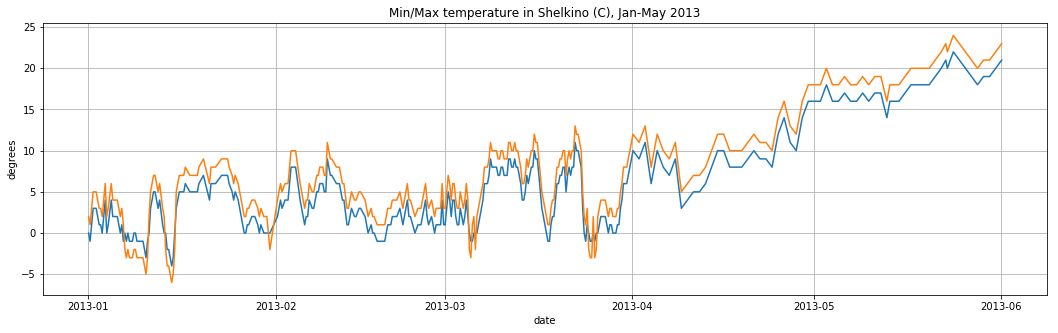

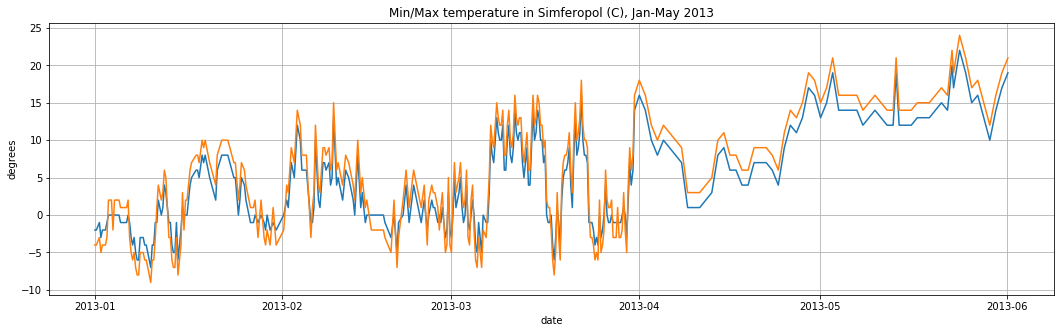

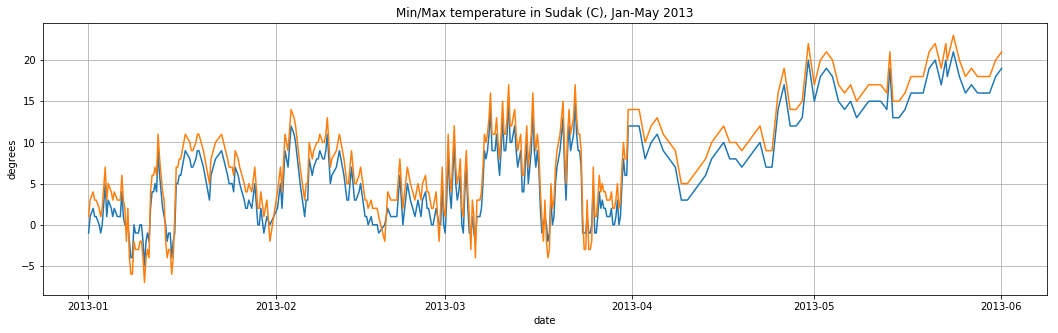

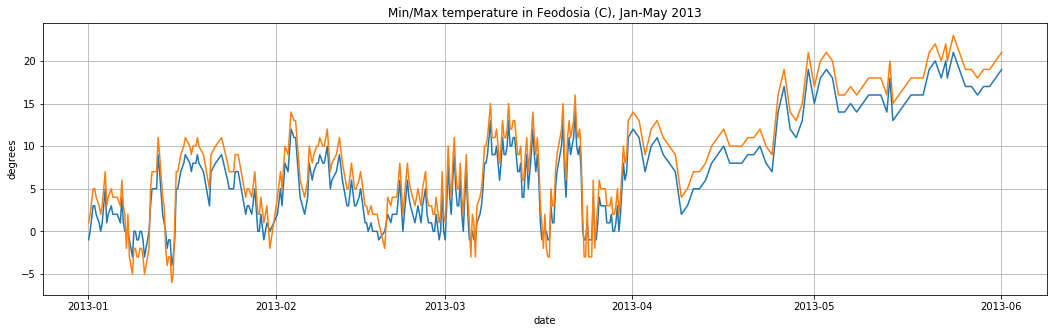

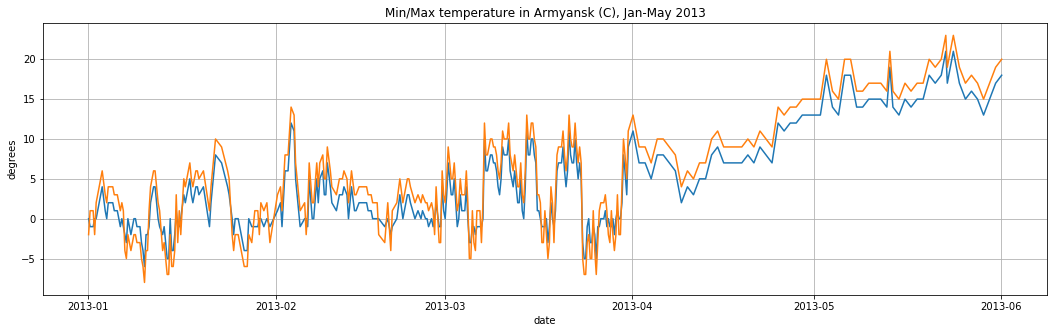

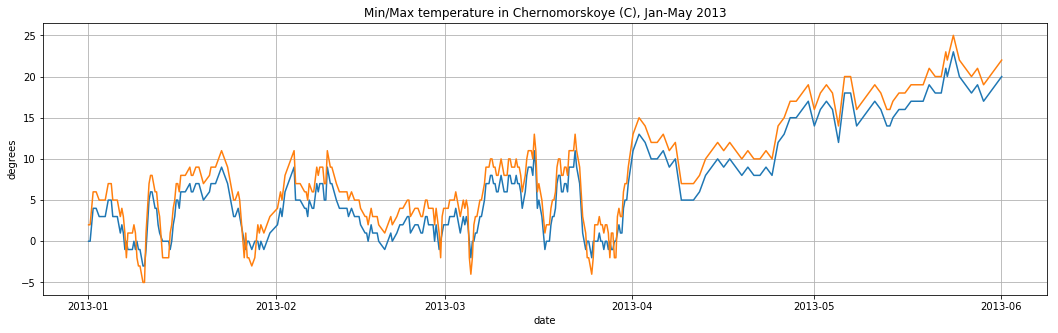

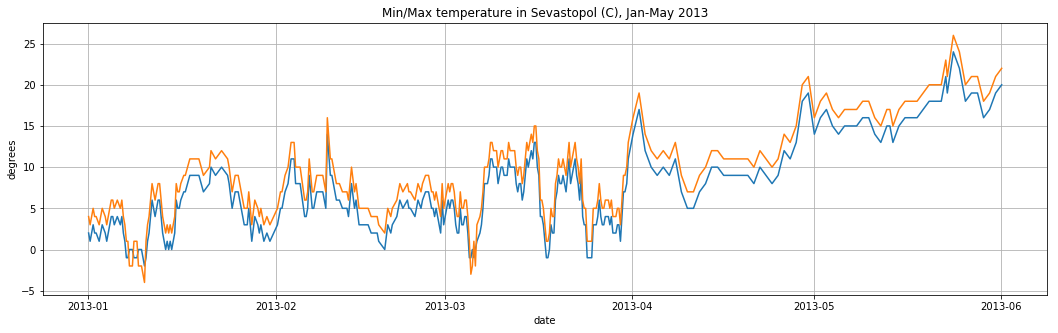

In [66]:
# plot Jan-May temperature for all cities
city_names_latin = {
    'Ялта': 'Yalta',
    'Алушта': 'Alushta',
    'Бахчисарай': 'Bakhchysarai',
    'Джанкой': 'Dzhankoi',
    'Евпатория': 'Evpatoria',
    'Саки': 'Saki',
    'Керчь': 'Kerch',
    'Красноперекопск': 'Krasnoperekopsk',
    'Щелкино': 'Shelkino',
    'Симферополь': 'Simferopol',
    'Судак': 'Sudak',
    'Феодосия': 'Feodosia',
    'Армянск': 'Armyansk',
    'Черноморское': 'Chernomorskoye',
    'Севастополь': 'Sevastopol'
}


def filter_city_and_dates(df, city_name):
    df_target = df.query("city_name == '{}' & date >= '2013-01-01' & "
                         "date <= '2013-06-01'".format(city_name))
    df_target = df_target.reset_index(drop=True)
    df_target = df_target.sort_values('datetime')
    
    return df_target


for city in df["city_name"].unique():
    df_test = filter_city_and_dates(df, city)

    plt.figure(figsize=(18, 5))
    x = df_test['datetime']
    y = df_test['min_temperature']
    plt.plot(x, y)
    y = df_test['max_temperature']
    plt.plot(x, y)
    plt.title("Min/Max temperature in {} (C), Jan-May 2013".format(city_names_latin[city]))
    plt.xlabel("date")
    plt.ylabel("degrees")
    plt.grid(True)


In [89]:
candidates = ["Ялта", "Алушта", "Щелкино"]
for city in candidates:
    _df = filter_city_and_dates(df, city)
    march_temp = _df.loc[(_df['date'] >= '2013-03-01') & (_df['date'] <= '2013-04-01')]['max_temperature']
    print("March average temperature in {}: {}".format(city_names_latin[city], 
                                                       round(march_temp.mean(), 1)))
    
    apr_temp = _df.loc[(_df['date'] >= '2013-04-01') & (_df['date'] <= '2013-05-01')]['max_temperature']
    print("April average temperature in {}: {}".format(city_names_latin[city], 
                                                       round(apr_temp.mean(), 2)))
    
    may_temp = _df.loc[(_df['date'] >= '2013-05-01') & (_df['date'] <= '2013-06-01')]['max_temperature']
    print("May average temperature in {}: {}".format(city_names_latin[city], 
                                                       round(may_temp.mean(), 2)))
    
    print("="*25)


March average temperature in Yalta: 8.2
April average temperature in Yalta: 11.71
May average temperature in Yalta: 18.39
March average temperature in Alushta: 7.6
April average temperature in Alushta: 11.37
May average temperature in Alushta: 18.0
March average temperature in Shelkino: 6.1
April average temperature in Shelkino: 10.86
May average temperature in Shelkino: 19.94


### Summary
* From all cities, only Yalta, Alushta and Shelkino sustained almost chilling-free weather in March, which would probably made possible for peach trees to blossom.
* Average temperature in following months (April, May) show that it was most probably impossible for peaches to ripen by the end of May. (it's reported as entirely possible in Fresno, California, where average temperatures for Feb, Mar, Apr, May (respectivelly) are the following: 17.2C, 20C, 23.9C, 28.9C ( [link1](http://www.davewilson.com/maturity-chart/commercial/yellow-peach-out-of-state), [link2](https://www.usclimatedata.com/climate/fresno/california/united-states/usca2234) ) 
* The peaches that were sold on my marketplace by the end of May as "Crimean", were probably imported from sunnier places.